In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd
% matplotlib inline

C:\Users\LYDIA\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
file_list = glob('20*.txt')
type(file_list)

list

In [3]:
t = []
for file in file_list:
    with open(file ,'r', encoding = 'utf-8') as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)

In [4]:
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [5]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LYDIA\AppData\Local\Temp\jieba.cache
Loading model cost 1.624 seconds.
Prefix dict has been built succesfully.


,﻿,創新,■,,品質,信賴,,大同,公司,致力,...,814,171,0.89%,7.00%,722,41,536,486,552,242
0,1,7,4,5617,8,2,3738,276,1056,6,...,1,1,1,1,1,2,1,1,1,1


In [6]:
df_drop = df.drop(df.columns.tolist()[0:2294]+df.columns.tolist()[10392:10405],axis=1)
df_drop

,《,足球,夏令,》,宜蘭,金門,澎湖,所國,中小,弱勢,...,814,171,0.89%,7.00%,722,41,536,486,552,242
0,4,2,2,4,2,1,1,1,1,2,...,1,1,1,1,1,2,1,1,1,1


In [7]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
df_tfidf[df_tfidf>0.01].dropna(axis=1)

,孩童,全數,營造,保證,誠信,規章,明示,行為,指南,不得,...,改選,154,認購,106.12,1.93,萬元,日及,各償還,萬,第五期
0,0.011681,0.033096,0.015575,0.015575,0.10513,0.019468,0.019468,0.027256,0.011681,0.019468,...,0.015575,0.015575,0.011681,0.046724,0.011681,0.021415,0.011681,0.029203,0.015575,0.011681


C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


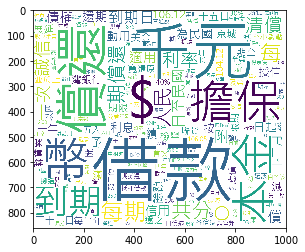

In [8]:
#再觀察一次文字雲並手動刪除不適合的資訊
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tfidf_dict = df_tfidf.to_dict(orient='records')
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[0])
plt.imshow(wordcloud)
plt.show()

In [33]:
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已','是否','(',')','關','相關','（','）','有','無','?','等','適用','提供','？','本','股','\uf0fc','千元','$','每','到期日','予','十二月','附','○','日至民國','日起','幣','為民國','106.12','共分','餘額','每期','續','減','三十一日','按','期','日','自民國','民國','期間','間','期至','第','者','除','計','新','：','註','達''月','；','至小數點','第二位']
for item in remove_list:
    tfidf_dict[0].pop(item, None)

C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


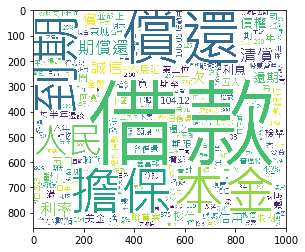

In [34]:
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已','是否','(',')','關','相關','（','）','有','無','?','等','適用','提供','？','本','股','\uf0fc','千元','$','每','到期日','予','十二月','附','○','日至民國','日起','幣','為民國','106.12','共分','餘額','每期','續','減','三十一日','按','期','日','自民國','民國','期間','間','期至','第','者','除','計','新','：','註','達''月','；','至小數點','第二位']
for item in remove_list:
    tfidf_dict[0].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[0])
plt.imshow(wordcloud)
plt.show()

C:\Users\LYDIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


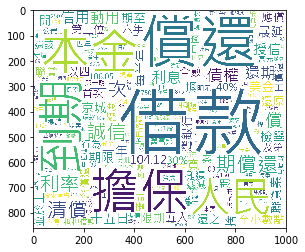

In [35]:
#結果圖呈現
remove_list = ['的','，','年','為','大同','在','與','於','股東','更','年度','已','是否','(',')','關','相關','（','）','有','無','?','等','適用','提供','？','本','股','\uf0fc','千元','$','每','到期日','予','十二月','附','○','日至民國','日起','幣','為民國','106.12','共分','餘額','每期','續','減','三十一日','按','期','日','自民國','民國','期間','間','期至','第','者','除','計','新','：','註','達''月','；','至小數點','第二位']
remove_list = remove_list +['資產','、','有限公司','對','','','','','','','','','']
for item in remove_list:
    tfidf_dict[0].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[0])
plt.imshow(wordcloud)
plt.show()

In [36]:
sort = sorted(tfidf_dict[0].items(), key=lambda x: x[1], reverse = True)
sort[0:30]

[('借款', 0.48476435008128066),
 ('償還', 0.28229249301921966),
 ('擔保', 0.19273763316484654),
 ('本金', 0.19079078838540364),
 ('到期', 0.18105656448818916),
 ('人民', 0.12849175544323102),
 ('期償還', 0.12070437632545944),
 ('清償', 0.11291699720768787),
 ('利率', 0.10902330764880208),
 ('誠信', 0.10512961808991629),
 ('一次', 0.09928908375158761),
 ('償', 0.08955485985437314),
 ('債權', 0.07203325683938709),
 ('還期', 0.06619272250105841),
 ('信用', 0.062299032942172615),
 ('利息', 0.06035218816272972),
 ('動用', 0.05840534338328683),
 ('授信', 0.052564809044958145),
 ('一年', 0.04672427470662946),
 ('十五日', 0.04672427470662946),
 ('京城', 0.04477742992718657),
 ('展延', 0.04477742992718657),
 ('美金', 0.04477742992718657),
 ('檢舉', 0.042830585147743676),
 ('寬', 0.042830585147743676),
 ('限期', 0.042830585147743676),
 ('期限', 0.042830585147743676),
 ('開', 0.04088374036830078),
 ('滿', 0.04088374036830078),
 ('灣銀行', 0.04088374036830078)]